<a href="https://colab.research.google.com/github/thiru2024/Swedish-leaf-prediction/blob/main/Code-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model,Sequential
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
image_size = [256,256]
#model = VGG19(input_shape = image_size+[3],include_top=False,weights='imagenet')
model = VGG19(include_top = False, weights = 'imagenet', input_shape = (256,256,3))

80150528/80134624 [==============================] - 1s 0us/step


In [3]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [4]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [5]:
final = Model(inputs = model.input,outputs = Dense(15,activation = 'softmax')(Flatten()(model.output)))

In [6]:
final.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [8]:
train = '/content/drive/My Drive/swidish leaf prediction'

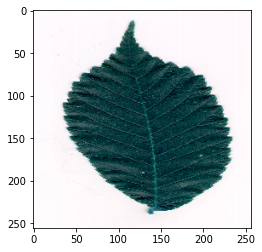

In [9]:
import matplotlib.pyplot as plt
import random
import os
import cv2
categories = ['Acer', 'Alnus incana', 'Betula pubescens', 'Fagus silvatica', 'Populus', 'Populus tremula', 'Quercus', 'Salix alba', 'Salix aurita', 'Salix sinerea', 'Sorbus aucuparia', 'Sorbus intermedia', 'Tilia', 'Ulmus carpinifolia', 'Ulmus glabra']
data = []
for cat in categories:
    folder = os.path.join(train,cat)
    label = categories.index(cat)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(256,256))
        data.append([img_arr,label])
        plt.imshow(img_arr)

In [10]:
x = []
y = []
for features,labels in data:
    x.append(features)
    y.append(labels)
import numpy as np

x = np.array(x)
y = np.array(y)
x.shape


(1125, 256, 256, 3)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
train_generator = ImageDataGenerator(rotation_range=3, horizontal_flip=True, zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=3, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
test_generator.fit(X_test)

In [18]:
vgg19 = final.fit(X_train,y_train,epochs=50,batch_size=50,validation_data=(X_test, y_test))

Epoch 1/50
16/16 [==============================] - 13s 837ms/step - loss: 0.2902 - accuracy: 0.9873 - val_loss: 0.2812 - val_accuracy: 0.9763
Epoch 2/50
16/16 [==============================] - 13s 839ms/step - loss: 0.3536 - accuracy: 0.9809 - val_loss: 0.0253 - val_accuracy: 0.9911
Epoch 3/50
16/16 [==============================] - 13s 843ms/step - loss: 0.0342 - accuracy: 0.9975 - val_loss: 0.1551 - val_accuracy: 0.9911
Epoch 4/50
16/16 [==============================] - 13s 844ms/step - loss: 0.1478 - accuracy: 0.9924 - val_loss: 1.0228e-08 - val_accuracy: 1.0000
Epoch 5/50
16/16 [==============================] - 13s 846ms/step - loss: 0.1499 - accuracy: 0.9924 - val_loss: 0.1790 - val_accuracy: 0.9941
Epoch 6/50
16/16 [==============================] - 13s 845ms/step - loss: 0.1307 - accuracy: 0.9911 - val_loss: 1.2561e-05 - val_accuracy: 1.0000
Epoch 7/50
16/16 [==============================] - 13s 843ms/step - loss: 0.0691 - accuracy: 0.9975 - val_loss: 0.0651 - val_accuracy

In [19]:
final.save('/content/drive/My Drive/imagevgg19-2.h5')

In [ ]:
# import tensorflow as tf
# final = tf.keras.models.load_model('/content/drive/My Drive/imagevgg19-2.h5')

# Show the model architecture


In [20]:
import numpy as np
predictions = final.predict(
    X_test, steps=None, callbacks=None, max_queue_size=10, workers=1,
    use_multiprocessing=False, verbose=0)# Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
# z = []
# def get_class(prediction):
#     if prediction > 0.5:
#         z.append(1)
#     else:
#         z.append(0)
# for prediction in predictions:
#   get_class(prediction)
# z = np.array(z)
pred_labels

array([11, 13,  0, 14,  5,  1,  3,  9,  5,  2, 12, 11,  3,  0, 14, 12, 12,
        1,  0,  7,  2,  2,  9,  7,  2,  1, 14, 10, 12,  7, 14,  7,  5,  1,
        8,  8, 12,  7, 14, 10, 12,  7,  2,  7,  2,  0,  4,  4, 13,  4, 10,
       10,  1,  9, 14,  1,  3,  9,  1,  0,  1,  2,  3,  3, 13,  2,  4,  9,
        7,  9, 12,  0,  0, 11, 11,  0, 12, 12,  1,  4,  7,  8,  0,  9,  5,
       13,  8,  3,  5, 12,  7, 14,  8,  7,  0,  6,  6,  0, 11,  5,  0, 13,
       13,  7,  9, 10,  9,  6, 11, 12,  4, 10,  3,  2,  2,  6,  5,  0, 13,
       14, 10, 12,  1, 14,  4,  2,  6, 11, 12,  3,  3,  6, 13, 12,  3,  7,
        9,  6, 10, 13, 10,  6,  9, 13,  2,  4, 13, 10,  3, 10,  1, 14, 14,
       12,  5,  1,  3,  6, 13,  9, 12,  4,  4,  8,  1,  5,  3,  6,  3, 11,
        9,  0, 12,  7, 10, 11, 13,  5,  7, 10,  0,  5,  1, 13,  0,  1,  5,
        4,  5, 10, 11,  8,  3, 13, 10, 14,  5,  9,  3, 10,  9, 10,  2,  8,
        7,  0, 12,  7,  4,  9, 13, 13, 13, 12,  0,  4, 14,  1, 13,  4,  1,
       10,  7,  3,  8, 10

In [21]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_labels)
print('Accuracy: %.2f' % acc)

Accuracy: 1.00


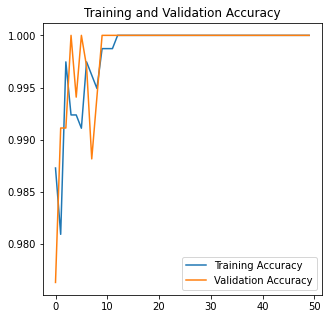

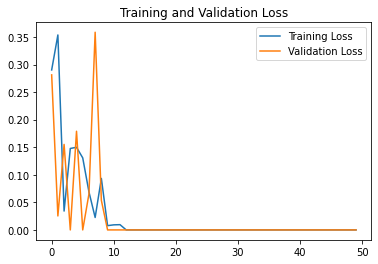

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
acc = vgg19.history['accuracy']
val_acc = vgg19.history['val_accuracy']
loss = vgg19.history['loss']
val_loss = vgg19.history['val_loss']

epochs = range(50)
plt.figure(figsize=(5, 5))
plt.plot(epochs,acc, label='Training Accuracy')
plt.plot(epochs,val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.subplot(1, 1, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Confusion matrix, without normalization
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20]]


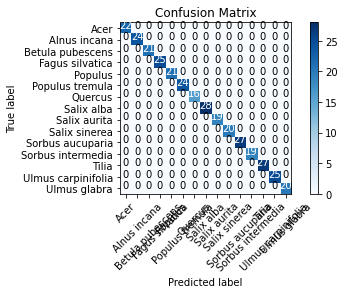

In [34]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test, y_pred=pred_labels)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Acer', 'Alnus incana', 'Betula pubescens', 'Fagus silvatica', 'Populus', 'Populus tremula', 'Quercus', 'Salix alba', 'Salix aurita', 'Salix sinerea', 'Sorbus aucuparia', 'Sorbus intermedia', 'Tilia', 'Ulmus carpinifolia', 'Ulmus glabra']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Confusion matrix, without normalization
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20]]


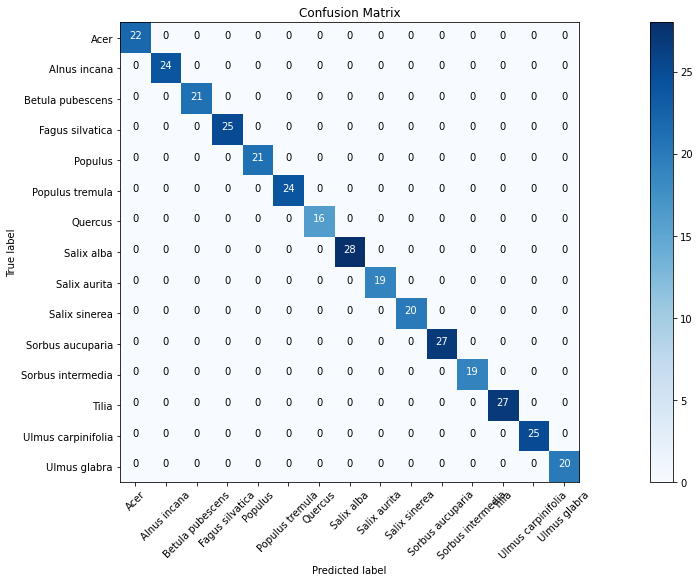

In [35]:
cm_plot_labels = ['Acer', 'Alnus incana', 'Betula pubescens', 'Fagus silvatica', 'Populus', 'Populus tremula', 'Quercus', 'Salix alba', 'Salix aurita', 'Salix sinerea', 'Sorbus aucuparia', 'Sorbus intermedia', 'Tilia', 'Ulmus carpinifolia', 'Ulmus glabra']
plt.figure(figsize=(20, 8))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [36]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
# predict probabilities for test set
yhat_probs = final.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = pred_labels
# reduce to 1d array

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
print("Precision Score : ",precision_score(y_test, pred_labels, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, pred_labels, 
                                           pos_label='positive',
                                           average='micro'))
# f1: 2 tp / (2 tp + fp + fn)
print("f1_Score : ",f1_score(y_test, pred_labels, 
                                           pos_label='positive',
                                           average='micro'))

# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs,multi_class="ovr",average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 1.000000
Precision Score :  1.0
Recall Score :  1.0
f1_Score :  1.0
Cohens kappa: 1.000000
ROC AUC: 1.000000
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [37]:
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=['Acer', 'Alnus incana', 'Betula pubescens', 'Fagus silvatica', 'Populus', 'Populus tremula', 'Quercus', 'Salix alba', 'Salix aurita', 'Salix sinerea', 'Sorbus aucuparia', 'Sorbus intermedia', 'Tilia', 'Ulmus carpinifolia', 'Ulmus glabra'])

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())
            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=pred_labels,
    y_score=yhat_probs)

print(report_with_auc)

                    precision  recall  f1-score  support   pred  AUC
Acer                      1.0     1.0       1.0     22.0    NaN  NaN
Alnus incana              1.0     1.0       1.0     24.0    NaN  NaN
Betula pubescens          1.0     1.0       1.0     21.0    NaN  NaN
Fagus silvatica           1.0     1.0       1.0     25.0    NaN  NaN
Populus                   1.0     1.0       1.0     21.0    NaN  NaN
Populus tremula           1.0     1.0       1.0     24.0    NaN  NaN
Quercus                   1.0     1.0       1.0     16.0    NaN  NaN
Salix alba                1.0     1.0       1.0     28.0    NaN  NaN
Salix aurita              1.0     1.0       1.0     19.0    NaN  NaN
Salix sinerea             1.0     1.0       1.0     20.0    NaN  NaN
Sorbus aucuparia          1.0     1.0       1.0     27.0    NaN  NaN
Sorbus intermedia         1.0     1.0       1.0     19.0    NaN  NaN
Tilia                     1.0     1.0       1.0     27.0    NaN  NaN
Ulmus carpinifolia        1.0     

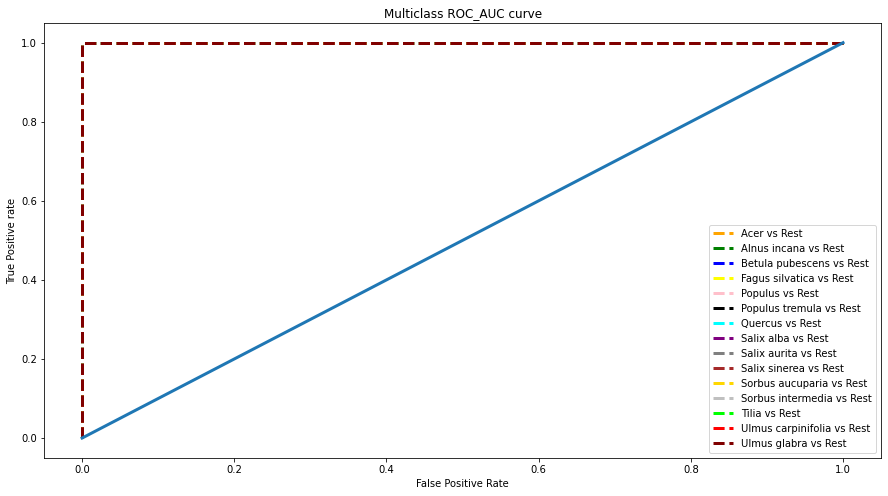

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, yhat_probs, average='macro',  sample_weight=None,  max_fpr=None,  multi_class='ovo', labels=None)
fpr = {}
tpr = {}
thresh ={}

n_class = 15

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, yhat_probs[:,i], pos_label=i)
    
# plotting   
fig = plt.figure(figsize=(15,8)) 
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Acer vs Rest',linewidth=3)
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Alnus incana vs Rest',linewidth=3)
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Betula pubescens vs Rest',linewidth=3)
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Fagus silvatica vs Rest',linewidth=3)
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Populus vs Rest',linewidth=3)
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Populus tremula vs Rest',linewidth=3)
plt.plot(fpr[6], tpr[6], linestyle='--',color='aqua', label='Quercus vs Rest',linewidth=3)
plt.plot(fpr[7], tpr[7], linestyle='--',color='purple', label='Salix alba vs Rest',linewidth=3)
plt.plot(fpr[8], tpr[8], linestyle='--',color='gray', label='Salix aurita vs Rest',linewidth=3)
plt.plot(fpr[9], tpr[9], linestyle='--',color='brown', label='Salix sinerea vs Rest',linewidth=3)
plt.plot(fpr[10], tpr[10], linestyle='--',color='gold', label='Sorbus aucuparia vs Rest',linewidth=3)
plt.plot(fpr[11], tpr[11], linestyle='--',color='silver', label='Sorbus intermedia vs Rest',linewidth=3)
plt.plot(fpr[12], tpr[12], linestyle='--',color='lime', label='Tilia vs Rest',linewidth=3)
plt.plot(fpr[13], tpr[13], linestyle='--',color='red', label='Ulmus carpinifolia vs Rest',linewidth=3)
plt.plot(fpr[14], tpr[14], linestyle='--',color='maroon', label='Ulmus glabra vs Rest',linewidth=3)
plt.plot(np.arange(0,1.01,0.01), np.arange(0,1.01,0.01), linewidth=3)
plt.title('Multiclass ROC_AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC_AUC',dpi=300);

In [59]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, yhat_classes)


1.0

In [40]:
from sklearn.metrics import jaccard_score
sc = jaccard_score(y_test, yhat_classes, average=None)
sc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

No handles with labels found to put in legend.


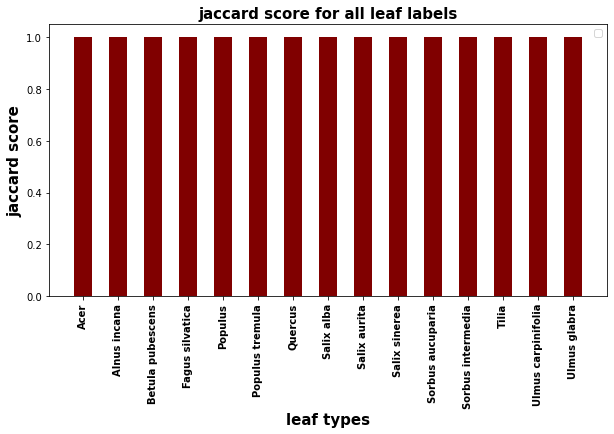

In [42]:
import numpy as np
import matplotlib.pyplot as plt
data = {}
labelss = ['Acer', 'Alnus incana', 'Betula pubescens', 'Fagus silvatica', 'Populus', 'Populus tremula', 'Quercus', 'Salix alba', 'Salix aurita', 'Salix sinerea', 'Sorbus aucuparia', 'Sorbus intermedia', 'Tilia', 'Ulmus carpinifolia', 'Ulmus glabra']
for i in range(len(sc)):
  data[labelss[i]] = sc[i]
# creating the dataset
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.5)
plt.xticks(range(len(courses)), courses, rotation='vertical',fontweight ='bold',fontsize = 10)
plt.xlabel("leaf types",fontweight ='bold',fontsize = 15)
plt.ylabel("jaccard score",fontweight ='bold',fontsize = 15)
plt.title("jaccard score for all leaf labels",fontweight ='bold',fontsize = 15)
plt.legend(loc='best')
plt.show()

In [48]:
pip install krippendorff